In [1]:
from constantMean import ConstantMean_swap
from token_class import Token
import matplotlib.pyplot as plt
import numpy as np

Uticaj tezina

/home/tatjana/Desktop/master/AMM/V2/V3/constantMean.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  return (Swap.getK(self) / (n**q))**(1/token.getWeight())


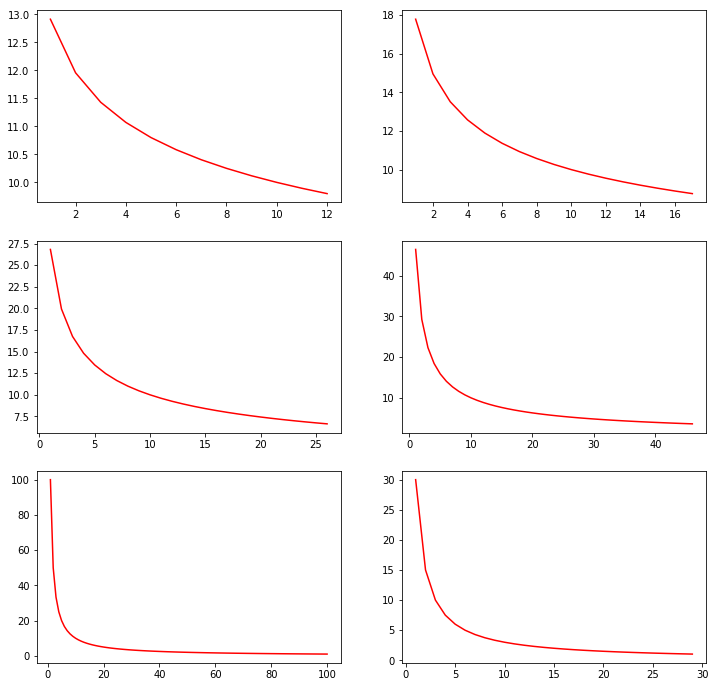

In [2]:

swap01 = ConstantMean_swap([Token('a', 10, 0.1), Token('b', 10, 0.9)])
swap1 = ConstantMean_swap([Token('a', 10, 0.2), Token('b', 10, 0.8)])
swap10 = ConstantMean_swap([Token('a', 10, 0.3), Token('b', 10, 0.7)])
swap100 = ConstantMean_swap([Token('a', 10, 0.4), Token('b', 10, 0.6)])
swap1000 = ConstantMean_swap([Token('a', 10, 0.5), Token('b', 10, 0.5)])
swap10000 = ConstantMean_swap([Token('a', 10, 0.5), Token('b', 3, 0.5)])
x = [i for i in range(0, 101)]
fig = plt.figure(figsize=(15,10))
# gs  = gridspec.GridSpec(4, 1, height_ratios=[1, 1 ,1.5, 1])
# ax0 = plt.subplot(gs[0])
# ax1 = plt.subplot(gs[1])
# ax2 = plt.subplot(gs[2])
# ax3 = plt.subplot(gs[3])
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
#x = [i in range(0, swap01.cost_function(), 1)]
x = np.arange(0, swap01.unknownAmount(1, swap01.getTokens()[1]), 1)
axes[0][0].plot(x, [swap01.unknownAmount(j, swap01.getTokens()[1]) for j in x], color = 'red', label = 'a')

x = np.arange(0, swap1.unknownAmount(1, swap1.getTokens()[1]), 1)
axes[0][1].plot(x, [swap1.unknownAmount(j, swap1.getTokens()[1]) for j in x], color = 'red', label = 'b')

x = np.arange(0, swap10.unknownAmount(1, swap10.getTokens()[1]),1)
axes[1][0].plot(x, [swap10.unknownAmount(j, swap10.getTokens()[1]) for j in x], color = 'red', label = 'c')

x = np.arange(0, swap100.unknownAmount(1, swap100.getTokens()[1]), 1)
axes[1][1].plot(x, [swap100.unknownAmount(j, swap100.getTokens()[1]) for j in x], color = 'red', label = 'd')

x = np.arange(0, swap1000.unknownAmount(1, swap1000.getTokens()[1]), 1)
axes[2][0].plot(x, [swap1000.unknownAmount(j, swap1000.getTokens()[1]) for j in x], color = 'red', label = 'd')

x = np.arange(0, swap10000.unknownAmount(1, swap10000.getTokens()[1]), 1)
axes[2][1].plot(x, [swap10000.unknownAmount(j, swap10000.getTokens()[1]) for j in x], color = 'red', label = 'd')

plt.savefig('ConstantMean.jpeg')
plt.show()

In [3]:
weight = [(0.1, 0.9), (0.3, 0.7), (0.5, 0.5), (0.7, 0.3), (0.9, 0.1)]

In [4]:
for w in weight:
    cm = ConstantMean_swap([Token('a', 1000, w[0]), Token('b', 1000, w[1])])
    c = round(cm.cost_function(), 4)
    p0_x = round(cm.price_function(cm.getTokens()[0]), 4)
    p0_y = round(cm.price_function(cm.getTokens()[1]), 4)
    pay = round(cm.swap('buy','a', 10), 4)
    p1_x = round(cm.price_function(cm.getTokens()[0]), 4)
    p1_y = round(cm.price_function(cm.getTokens()[1]), 4)
    
    print('w=', w, 'C=', c, 'P0(x)= ', p0_x, 'P0(y)= ', p0_y, 'pay=', pay,  'P1(x)= ', p1_x, 'P1(y)= ', p1_y)
    cm.poolState()
    print()

w= (0.1, 0.9) C= 1000.0 P0(x)=  0.1995 P0(y)=  451.0685 pay= 1.1173 P1(x)=  0.2016 P1(y)=  446.508
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1001.11732773

w= (0.3, 0.7) C= 1000.0 P0(x)=  2.383 P0(y)=  88.1248 pay= 4.3166 P1(x)=  2.4102 P1(y)=  87.1309
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1004.31657649

w= (0.5, 0.5) C= 1000.0 P0(x)=  15.8114 P0(y)=  15.8114 pay= 10.101 P1(x)=  16.0516 P1(y)=  15.5748
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1010.1010101

w= (0.7, 0.3) C= 1000.0 P0(x)=  88.1248 P0(y)=  2.383 pay= 23.7279 P1(x)=  90.4882 P1(y)=  2.3207
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1023.72791536

w= (0.9, 0.1) C= 1000.0 P0(x)=  451.0685 P0(y)=  0.1995 pay= 94.6701 P1(x)=  494.2677 P1(y)=  0.1821
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1094.67008177



Nezavisnost od putanje

In [5]:
#Kupovina odjednom
c = ConstantMean_swap([Token('a', 1000, 0.55), Token('b', 1000, 0.45)])

In [6]:
round(c.cost_function(), 4)

1000.0

In [7]:
round(c.swap('buy', 'a', 10), 4)

12.3595

In [8]:
#Kupovina jedan po jedan
swap_path_idepedent = ConstantMean_swap([Token('a', 1000, 0.55), Token('b', 1000, 0.45)])
s = 0
for i in range(10):
    pay = round(swap_path_idepedent.swap('buy', 'a', 1), 5)
    print()
    print('Korisnik placa: ', round(pay, 4))
    swap_path_idepedent.poolState()
    s += pay
print()
print('Ukupni troskovi', round(s, 4))


Korisnik placa:  1.2236
Token:
	name:  a 	amount:  999
Token:
	name:  b 	amount:  1001.22358171

Korisnik placa:  1.2263
Token:
	name:  a 	amount:  998
Token:
	name:  b 	amount:  1002.44988824

Korisnik placa:  1.229
Token:
	name:  a 	amount:  997
Token:
	name:  b 	amount:  1003.6789284

Korisnik placa:  1.2318
Token:
	name:  a 	amount:  996
Token:
	name:  b 	amount:  1004.91071103

Korisnik placa:  1.2345
Token:
	name:  a 	amount:  995
Token:
	name:  b 	amount:  1006.14524502

Korisnik placa:  1.2373
Token:
	name:  a 	amount:  994
Token:
	name:  b 	amount:  1007.38253929

Korisnik placa:  1.2401
Token:
	name:  a 	amount:  993
Token:
	name:  b 	amount:  1008.6226028

Korisnik placa:  1.2428
Token:
	name:  a 	amount:  992
Token:
	name:  b 	amount:  1009.86544453

Korisnik placa:  1.2456
Token:
	name:  a 	amount:  991
Token:
	name:  b 	amount:  1011.11107353

Korisnik placa:  1.2484
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1012.35949887

Ukupni troskovi 12.3595


Osetljivost na likvidnost

In [9]:
init = [50, 100, 500, 1000, 5000, 10000]

In [10]:
for i in init:
    swap_liquidity = ConstantMean_swap([Token('a', i, 0.55), Token('b', i, 0.45)])
    print(i)
    print('c0 = ' ,round(swap_liquidity.cost_function(), 4))
    print('p1_0 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[0]), 4))
    print('p2_0 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[1]), 4))
    pay = swap_liquidity.swap('buy','a', 10)
    print('pay = ', round(pay, 4))
    print('p1_1 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[0]), 4))
    print('p2_1 = ', round(swap_liquidity.price_function(swap_liquidity.getTokens()[1]), 4))
    
    swap_liquidity.poolState()
    print()

50
c0 =  50.0
p1_0 =  4.7293
p2_0 =  2.6167
pay =  15.6773
p1_1 =  6.8683
p2_1 =  1.8017
Token:
	name:  a 	amount:  40
Token:
	name:  b 	amount:  65.67734313

100
c0 =  100.0
p1_0 =  6.9241
p2_0 =  3.5745
pay =  13.7433
p1_1 =  8.2581
p2_1 =  2.9971
Token:
	name:  a 	amount:  90
Token:
	name:  b 	amount:  113.74329938

500
c0 =  500.0
p1_0 =  16.7802
p2_0 =  7.3748
pay =  12.4998
p1_1 =  17.3567
p2_1 =  7.1298
Token:
	name:  a 	amount:  490
Token:
	name:  b 	amount:  512.49978744

1000
c0 =  1000.0
p1_0 =  24.5676
p2_0 =  10.0742
pay =  12.3595
p1_1 =  24.984
p2_1 =  9.9063
Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1012.35949887

5000
c0 =  5000.0
p1_0 =  59.5383
p2_0 =  20.785
pay =  12.2494
p1_1 =  59.7379
p2_1 =  20.7155
Token:
	name:  a 	amount:  4990
Token:
	name:  b 	amount:  5012.24944118

10000
c0 =  10000.0
p1_0 =  87.1691
p2_0 =  28.3931
pay =  12.2358
p1_1 =  87.3151
p2_1 =  28.3456
Token:
	name:  a 	amount:  9990
Token:
	name:  b 	amount:  10012.23581707



In [11]:
c_max = ConstantMean_swap([Token('a', 100, 0.55), Token('b', 100, 0.45)])

In [12]:
c_max.swap('buy', 'b',99.9)

28380.35868435935

In [13]:
c.poolState()

Token:
	name:  a 	amount:  990
Token:
	name:  b 	amount:  1012.35949887
